[View in Colaboratory](https://colab.research.google.com/github/hanshika0292/EIP-Assignments/blob/master/HANSHIKA_BATCH_4_ASSIGNMENT4A.ipynb)

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


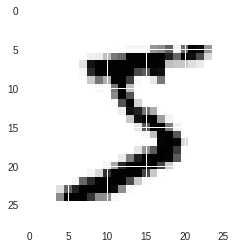

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 1, 7, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 7, 1, activation='relu'))
model.add(Convolution2D(32, 1, 7, activation='relu'))
model.add(Convolution2D(32, 7, 1, activation='relu'))
model.add(Convolution2D(32, 1, 7, activation='relu'))
model.add(Convolution2D(32, 7, 1, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 7), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 7), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 7), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call 

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 22, 32)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        7200      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 16, 32)        7200      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        7200      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 10, 32)        7200      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 32)        7200      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 10)        330       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 31s 511us/step - loss: 0.1811 - acc: 0.9437
Epoch 2/10
33408/60000 [===============>..............] - ETA: 12s - loss: 0.0687 - acc: 0.9791

60000/60000 [==============================] - 29s 488us/step - loss: 0.0649 - acc: 0.9806
Epoch 3/10
54240/60000 [==========================>...] - ETA: 2s - loss: 0.0488 - acc: 0.9850

60000/60000 [==============================] - 29s 491us/step - loss: 0.0483 - acc: 0.9852
Epoch 4/10
60000/60000 [==============================] - 29s 490us/step - loss: 0.0403 - acc: 0.9876
Epoch 5/10
 2208/60000 [>.............................] - ETA: 27s - loss: 0.0312 - acc: 0.9887

60000/60000 [==============================] - 29s 491us/step - loss: 0.0343 - acc: 0.9890
Epoch 6/10
40224/60000 [===================>..........] - ETA: 9s - loss: 0.0288 - acc: 0.9912

60000/60000 [==============================] - 29s 489us/step - loss: 0.0297 - acc: 0.9907
Epoch 7/10
57440/60000 [===========================>..] - ETA: 1s - loss: 0.0270 - acc: 0.9916

60000/60000 [==============================] - 30s 493us/step - loss: 0.0273 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 30s 492us/step - loss: 0.0235 - acc: 0.9929
Epoch 9/10
 2784/60000 [>.............................] - ETA: 28s - loss: 0.0147 - acc: 0.9964

60000/60000 [==============================] - 30s 495us/step - loss: 0.0212 - acc: 0.9931
Epoch 10/10
39968/60000 [==================>...........] - ETA: 9s - loss: 0.0164 - acc: 0.9945

60000/60000 [==============================] - 30s 493us/step - loss: 0.0179 - acc: 0.9941


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.029546997451512288, 0.9911]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.1699437e-15 2.4320579e-13 8.9817853e-10 1.8250049e-09 5.3042068e-20
  2.4110794e-13 5.8254366e-22 1.0000000e+00 1.0527264e-16 4.2295331e-10]
 [2.4646783e-06 4.5416389e-05 9.9968922e-01 1.9293431e-10 3.5600589e-08
  2.6532845e-10 2.6282645e-04 2.0095717e-08 3.8106442e-09 1.1711658e-10]
 [2.7534104e-14 9.9999952e-01 4.1598565e-09 5.3974162e-11 3.3461617e-07
  6.8886759e-09 4.3896189e-10 1.0895946e-07 7.6164497e-09 6.2085653e-10]
 [9.9999225e-01 4.0937695e-14 8.1593461e-09 6.7565203e-13 7.4794864e-09
  6.9872698e-11 7.6985161e-06 7.3267770e-10 1.4431395e-08 4.8464019e-09]
 [8.3068609e-14 1.4170419e-09 1.4165589e-12 5.8972119e-11 9.9999678e-01
  1.6858936e-11 1.7560990e-09 1.0098355e-07 6.0498433e-11 3.1299242e-06]
 [1.8725628e-14 9.9999952e-01 1.4890904e-09 8.1313515e-12 1.2599935e-07
  3.0900149e-10 1.4735867e-10 3.3017005e-07 1.3056879e-09 2.8764499e-10]
 [3.7673760e-20 1.0620931e-07 1.5398069e-12 1.7017894e-12 9.9999964e-01
  1.6915165e-10 2.0844621e-17 5.4721294e-09 2.2514152e-08 

In [18]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7ffb7e0bc518>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7ffb7c09b080>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7ffbbc4e52e8>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7ffb7c09b2e8>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7ffb7c04e278>, 'conv2d_6': <keras.layers.convolutional.Conv2D object at 0x7ffb7c064668>, 'conv2d_7': <keras.layers.convolutional.Conv2D object at 0x7ffb7c00b3c8>, 'conv2d_8': <keras.layers.convolutional.Conv2D object at 0x7ffb7bfb55c0>, 'flatten_1': <keras.layers.core.Flatten object at 0x7ffb7bf77828>, 'activation_1': <keras.layers.core.Activation object at 0x7ffb7bf8b3c8>}


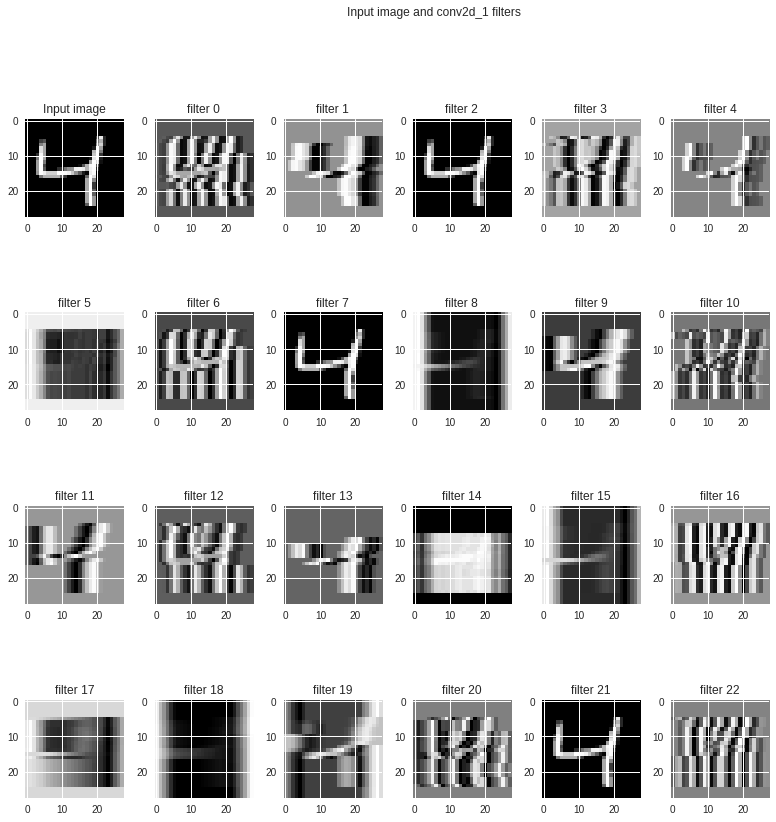

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()